#### Загрузите данные ex7data1.mat из файла.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 7/'

In [3]:
files_names = os.listdir(DATA_PATH)
print(files_names)

files_paths = {name: os.path.join(DATA_PATH, name) for name in files_names}

['ex7faces.mat', 'ex7data1.mat']


In [4]:
from scipy.io import loadmat

data1 = loadmat(files_paths['ex7data1.mat'])

X = data1['X']
print(X.shape)

(300, 2)


#### Постройте график загруженного набора данных.

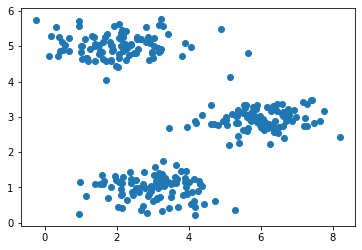

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Реализуйте функцию вычисления матрицы ковариации данных.
#### Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).
#### Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.
#### Реализуйте функцию вычисления обратного преобразования.

In [6]:
class PCA:
    def __init__(self, n_components=5):
        self.n_components = n_components
        self._mean = None
        self._pc = None
    
    def fit(self, X):
        self._mean = X.mean(axis=0)
        cov_matrix = np.cov(X.T)
        u, _, _ = np.linalg.svd(cov_matrix)
        self._u = u
        self._pc = self._u[:, :self.n_components]#self._v[-self.n_components:]#
        return self
    
    def transform(self, X):
        return (X - self._mean) @ self._pc
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X):
        return X @ self._pc.T + self._mean

In [7]:
pca = PCA(n_components=1)
X0 = pca.fit_transform(X)
X_ = pca.inverse_transform(X0)
v = pca._u.T

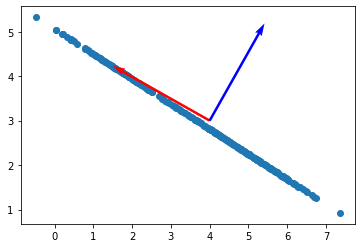

In [8]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.quiver([4], [3], v[0], v[1], color=['r','b'], scale=3)
plt.show()

#### Постройте на графике из пункта 2 собственные векторы матрицы ковариации.

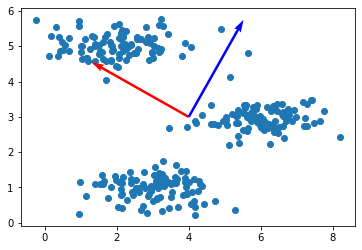

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.quiver([4], [3], v[0], v[1], color=['r','b'], scale=3)
plt.show()

#### Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).

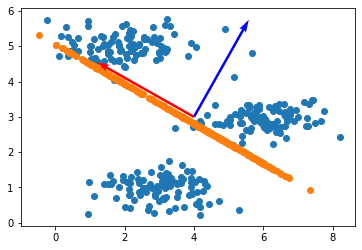

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_[:, 0], X_[:, 1])
plt.quiver([4], [3], v[0], v[1], color=['r','b'], scale=3)
plt.show()

#### Загрузите данные ex7faces.mat из файла.

In [11]:
data2 = loadmat(files_paths['ex7faces.mat'])

X2 = data2['X']
print(X2.shape)

(5000, 1024)


#### Визуализируйте 100 случайных изображений из набора данных.

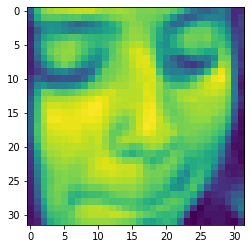

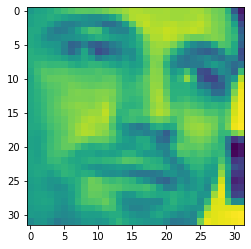

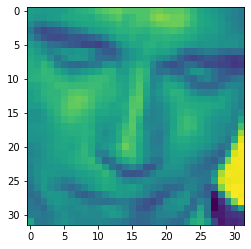

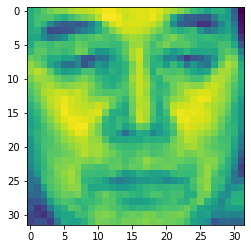

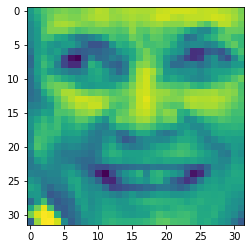

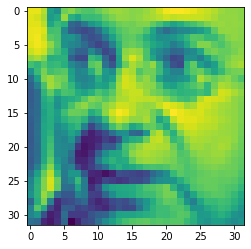

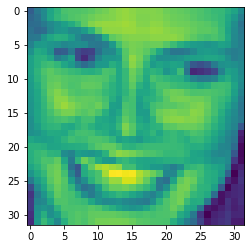

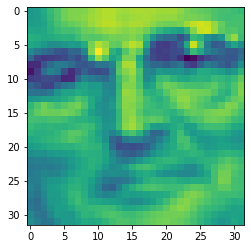

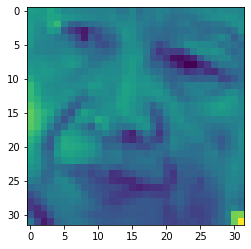

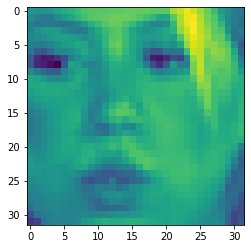

In [40]:
indexes = np.random.randint(X2.shape[0], size=10)

for i in indexes:
    img = X2[i].reshape((32, 32))
    plt.imshow(img.T)
    plt.show()

#### С помощью метода главных компонент вычислите собственные векторы

In [41]:
pca = PCA()
pca.fit(X2)
v = pca._u.T

#### Визуализируйте 36 главных компонент с наибольшей дисперсией.

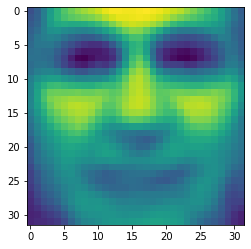

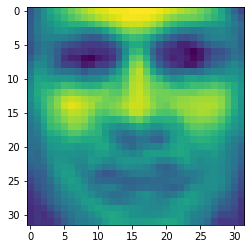

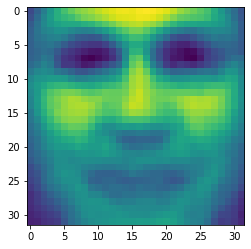

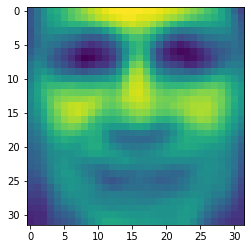

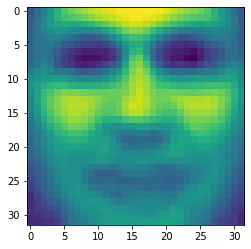

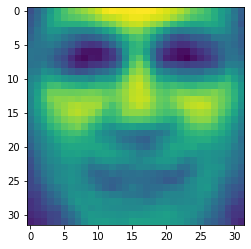

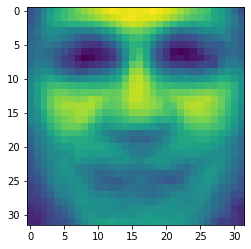

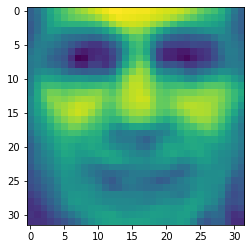

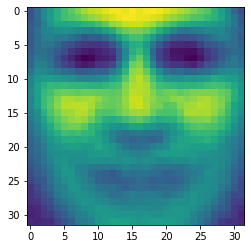

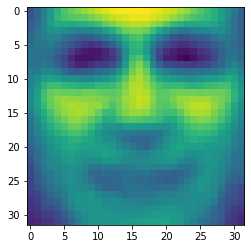

In [42]:
pca._pc = v[np.argsort(v.std(axis=1))[-36:]].T

for i in indexes:
    img = X2[i:i+1]
    img = pca.transform(img)
    img = pca.inverse_transform(img).reshape((32, 32))
    plt.imshow(img.T)
    plt.show()

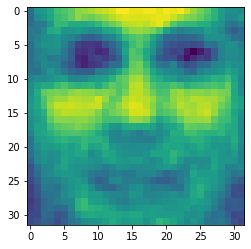

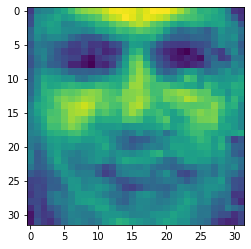

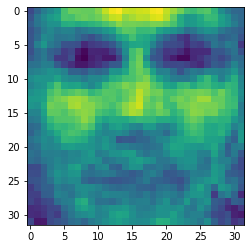

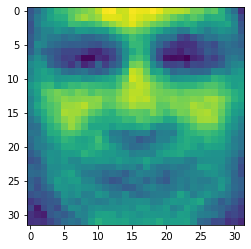

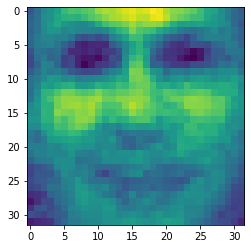

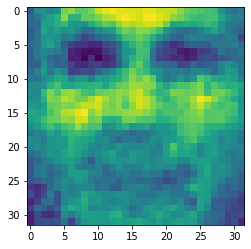

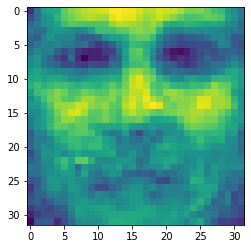

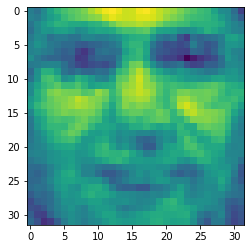

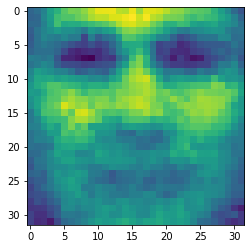

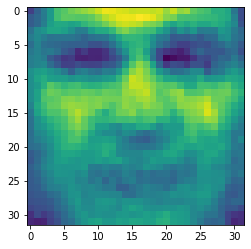

In [43]:
pca._pc = v[np.argsort(v.std(axis=1))[-512:]].T

for i in indexes:
    img = X2[i:i+1]
    img = pca.transform(img)
    img = pca.inverse_transform(img).reshape((32, 32))
    plt.imshow(img.T)
    plt.show()

#### Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).
#### С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.

In [44]:
import cv2

img = cv2.imread('processed_bird_small_img.png')
img = cv2.resize(img, (32, 32))

In [46]:
img.shape

(32, 32, 3)

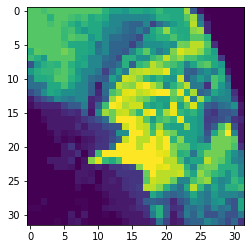

In [47]:
plt.imshow(img[:,:,1].astype('uint8'))

In [54]:
img_flatten = img[:,:,1].reshape((1, 32*32))

pca._pc = v[np.argsort(v.std(axis=1))[-2:]].T
img_point2D = pca.transform(img_flatten)[0]

pca._pc = v[np.argsort(v.std(axis=1))[-3:]].T
img_point3D = pca.transform(img_flatten)[0]

In [55]:
img_point2D, img_point3D

(array([41.69948661, 23.57427804]),
 array([10.15828264, 41.69948661, 23.57427804]))

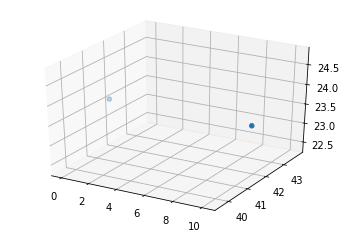

In [60]:
from mpl_toolkits.mplot3d import Axes3D

x = [0, img_point3D[0]]
y = [img_point2D[0], img_point3D[1]]
z = [img_point2D[1], img_point3D[2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()